In [1]:
import pandas as pd

from dpks.quant_matrix import QuantMatrix

design_matrix_file = "../tests/input_files/de_design_matrix.tsv"

design_matrix = pd.read_csv(design_matrix_file, sep="\t")
design_matrix["batch"] = [1] * 10 + [2] * 8
design_matrix

/Users/erikhartman/dev/DPKS/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[WARNING] nopython is set for njit and is ignored



,sample,group,batch
0,AAS_P2009_167,6,1
1,AAS_P2009_169,4,1
2,AAS_P2009_176,6,1
3,AAS_P2009_178,4,1
4,AAS_P2009_187,4,1
5,AAS_P2009_194,6,1
6,AAS_P2009_196,4,1
7,AAS_P2009_203,6,1
8,AAS_P2009_205,4,1
9,AAS_P2009_212,6,1


In [2]:
import numpy as np

data_file = pd.read_csv("../tests/input_files/de_matrix.tsv", sep="\t")

for sample in design_matrix[design_matrix["batch"] == 1]["sample"]:
    data_file[sample] = data_file[sample] + np.random.normal(loc=10000000)

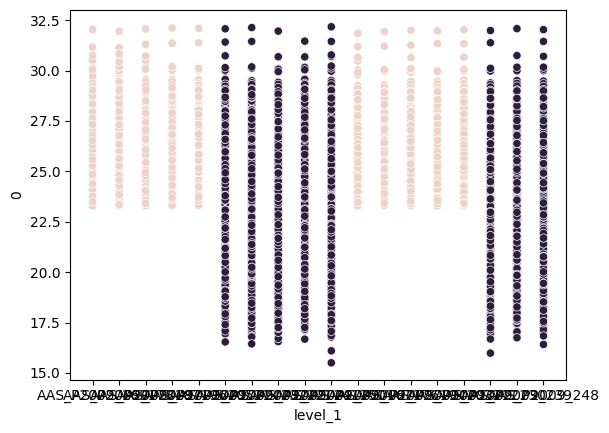

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

quant_matrix = QuantMatrix(
    quantification_file=data_file,
    design_matrix_file=design_matrix,
)

quantified_data = quant_matrix.filter().normalize(method="log2")
plot_df = (
    quantified_data.to_df()
    .set_index("Protein")[design_matrix["sample"]]
    .stack()
    .reset_index()
)

plot_df = plot_df.merge(design_matrix, left_on="level_1", right_on="sample")
sns.scatterplot(plot_df, x="level_1", y=0, hue="batch")
plt.legend().remove()

Found 2 batches
Adjusting for 0 covariate(s) or covariate level(s)
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.


[WARNING] divide by zero encountered in true_divide



Adjusting the Data


[WARNING] invalid value encountered in log2



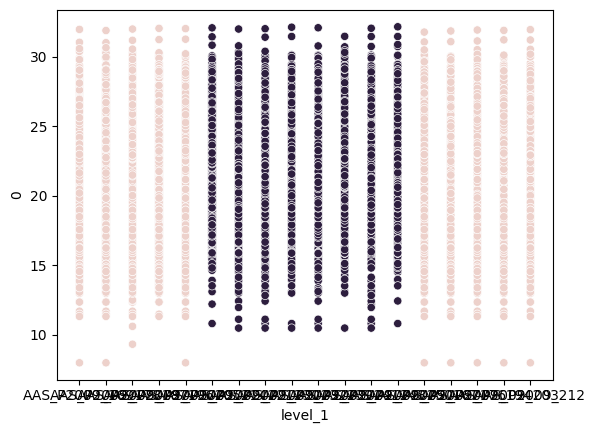

In [5]:
quant_matrix = QuantMatrix(
    quantification_file=data_file,
    design_matrix_file=design_matrix,
)

quantified_data = (
    quant_matrix.filter(remove_all_zeros=True)
    .normalize(method="log2")
    .correct(method="combat")
)

plot_df = (
    quantified_data.to_df()
    .set_index("Protein")[design_matrix["sample"]]
    .stack()
    .reset_index()
)
plot_df = plot_df.merge(design_matrix, left_on="level_1", right_on="sample")
sns.scatterplot(plot_df, x="level_1", y=0, hue="batch")
plt.legend().remove()

[WARNING] Mean of empty slice

[WARNING] Degrees of freedom <= 0 for slice.

[WARNING] Mean of empty slice

[WARNING] invalid value encountered in true_divide

[WARNING] divide by zero encountered in true_divide

[WARNING] invalid value encountered in multiply



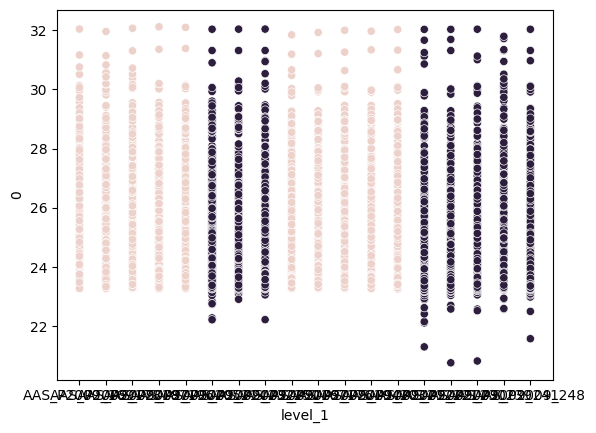

In [7]:
quant_matrix = QuantMatrix(
    quantification_file=data_file,
    design_matrix_file=design_matrix,
)

quantified_data = (
    quant_matrix.filter(remove_all_zeros=True)
    .normalize(method="log2")
    .correct(method="mean", reference_batch=1)
)

plot_df = (
    quantified_data.to_df()
    .set_index("Protein")[design_matrix["sample"]]
    .stack()
    .reset_index()
)
plot_df = plot_df.merge(design_matrix, left_on="level_1", right_on="sample")
sns.scatterplot(plot_df, x="level_1", y=0, hue="batch")
plt.legend().remove()

[WARNING] n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



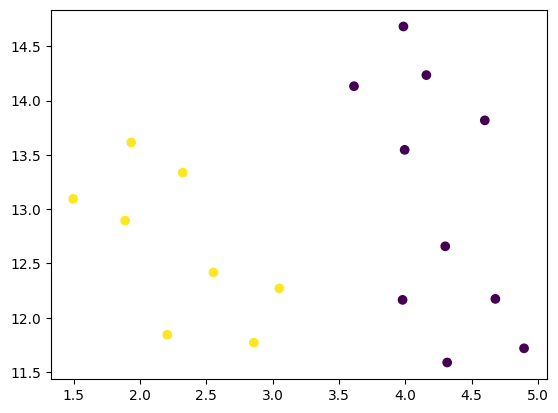

In [8]:
from umap import UMAP

quant_matrix = QuantMatrix(
    quantification_file=data_file,
    design_matrix_file=design_matrix,
)

quantified_data = (
    quant_matrix.filter()
    .normalize(method="log2")
    .quantify(method="top_n")
    .impute(method="uniform_percentile")
)

X = pd.DataFrame(quantified_data.quantitative_data.X).fillna(0).T

y = design_matrix["group"]

X_reduced = UMAP(random_state=42).fit_transform(X)


plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

Found 2 batches
Adjusting for 0 covariate(s) or covariate level(s)
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


[WARNING] invalid value encountered in log2

[WARNING] n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



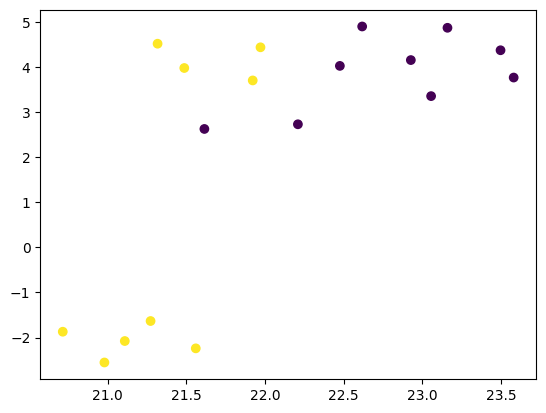

In [11]:
from umap import UMAP

quant_matrix = QuantMatrix(
    quantification_file=data_file,
    design_matrix_file=design_matrix,
)

quantified_data = (
    quant_matrix.filter()
    .normalize(method="log2")
    .quantify(method="top_n")
    .impute(method="uniform_percentile")
    .correct(method="combat")
)

X = pd.DataFrame(quantified_data.quantitative_data.X).fillna(0).T

y = design_matrix["group"]

X_reduced = UMAP(random_state=42).fit_transform(X)


plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

[WARNING] n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



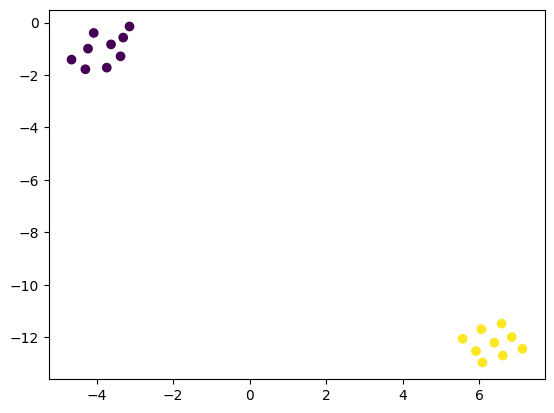

In [12]:
from umap import UMAP

quant_matrix = QuantMatrix(
    quantification_file=data_file,
    design_matrix_file=design_matrix,
)

quantified_data = (
    quant_matrix.filter()
    .normalize(method="log2")
    .quantify(method="top_n")
    .impute(method="uniform_percentile")
    .correct(method="mean", reference_batch=1)
)

X = pd.DataFrame(quantified_data.quantitative_data.X).fillna(0).T

y = design_matrix["group"]

X_reduced = UMAP(random_state=42).fit_transform(X)


plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)